# Linear Regression Project

You just got some contract work with an Ecommerce company based in New York City that sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

The company is trying to decide whether to focus their efforts on their mobile app experience or their website. They've hired you on contract to help them figure it out! Let's get started!

## Set-up

Load the required libraries

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Get and inspect the data

In [61]:
df = pd.read_csv('Ecommerce Customers')

In [62]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [64]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


## Exploratory Data Analysis

First I will create a joinplot to compare Time on Website/App and Yearly Amount Spent

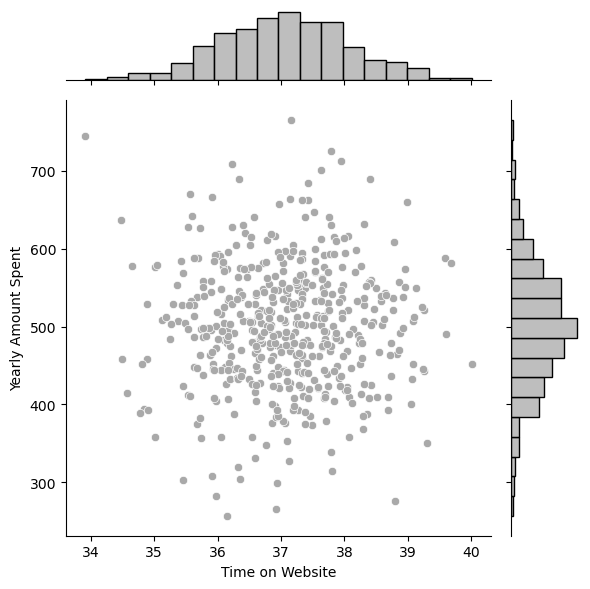

In [65]:
sns.jointplot(x = 'Time on Website', y = 'Yearly Amount Spent', data= df, color = 'darkgrey')
plt.tight_layout()
plt.show()

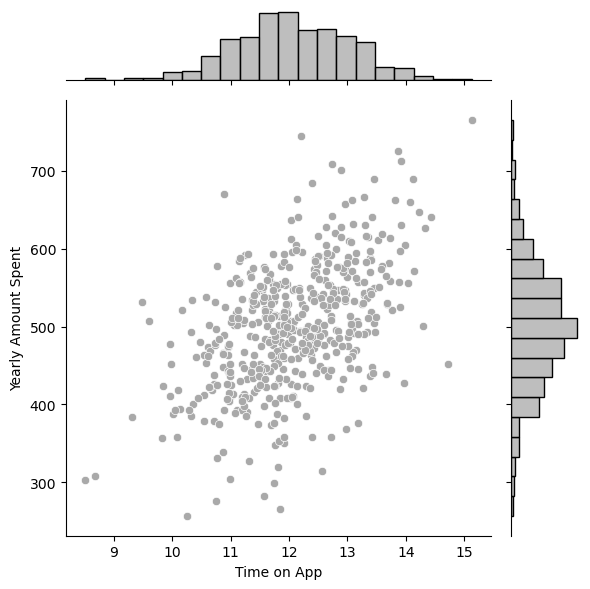

In [66]:
sns.jointplot(x = 'Time on App', y = 'Yearly Amount Spent', data= df, color = 'darkgrey')
plt.tight_layout()
plt.show()

There is a clear positive relationship between the time on the App and the yearly amount spent (the longer the time on the App, the greater the amount spent). This relationship is much stronger than when comparing it to time on website, for which there is no clear relationship.

Next, lets create a joinplot but usin hex bin to compare Time on App and Lenght of Membership

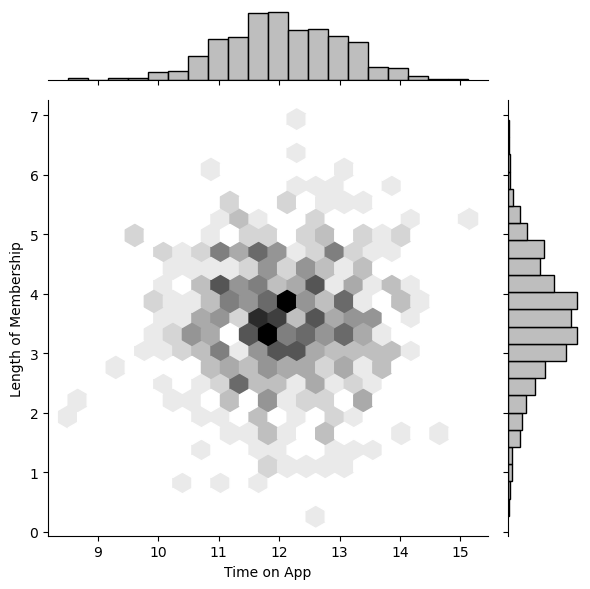

In [94]:
sns.jointplot(x = 'Time on App', y = 'Length of Membership', data= df, color = 'darkgrey', kind= 'hex')
plt.tight_layout()
plt.show()

There seems to be no pattern in terms of membership and time spent on the app. This potentially suggests that the app itself might not be related to establishing and keeping a loyal clientele.

Let's zoom out and explore

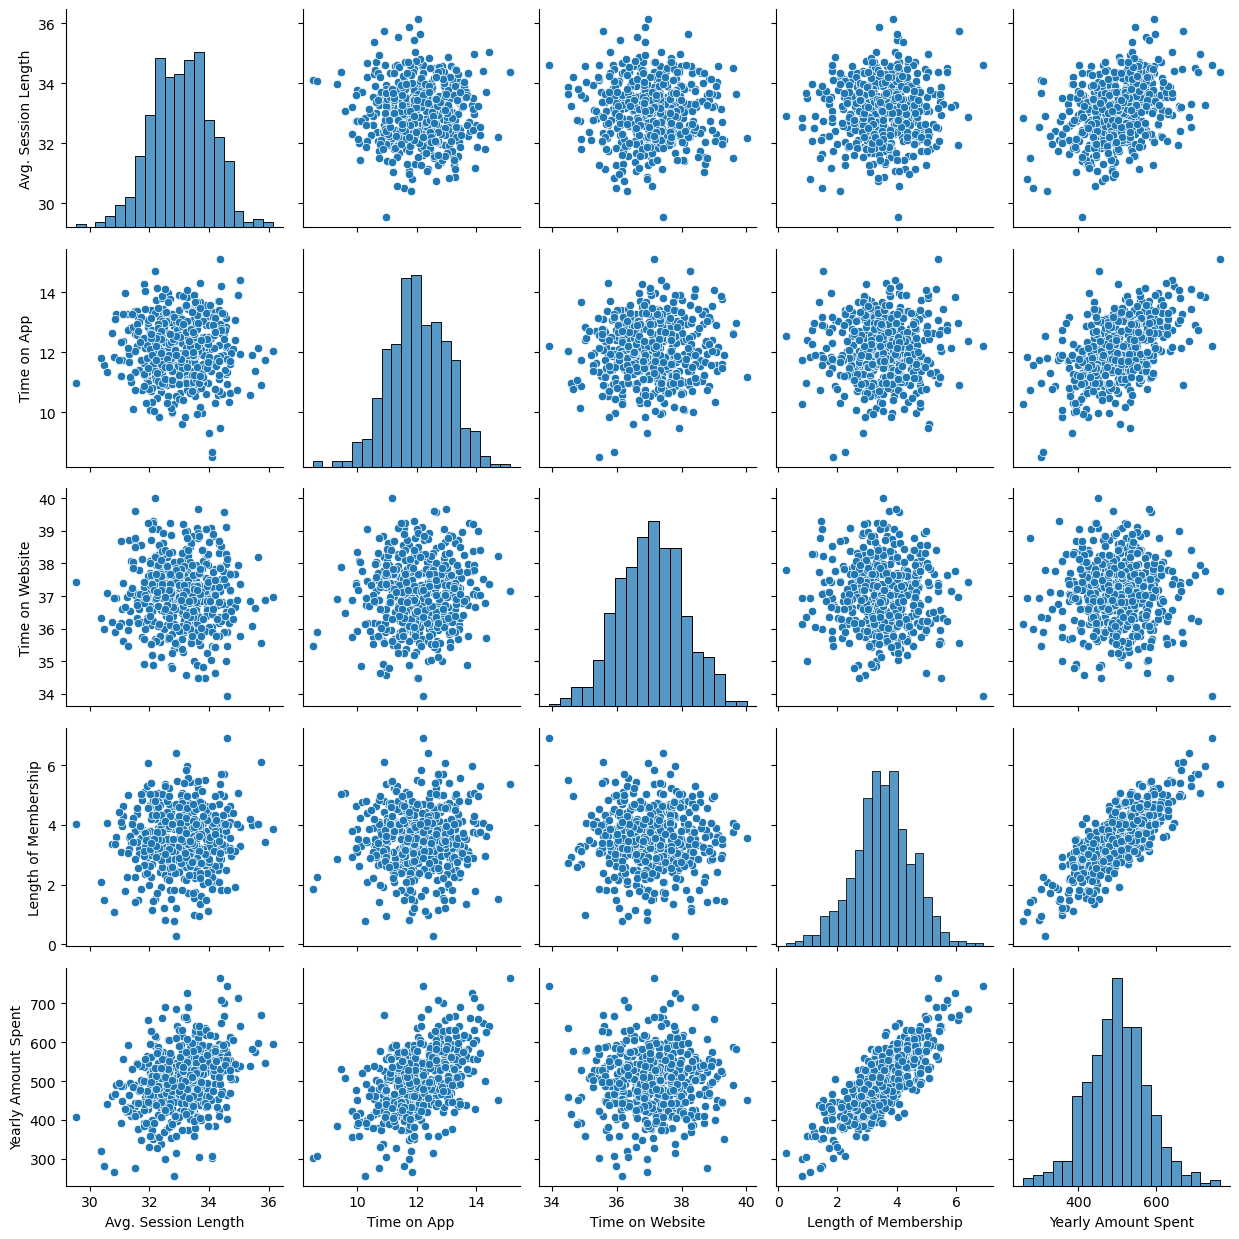

In [68]:
sns.pairplot(df)
plt.tight_layout()
plt.show()

One of the clearest relationship seems to connect the **length of membership** to the yearly amount spent. Less clear but seemenly important too is the relationship we discovered earlier where the time on App could also be related to the yearly amount spent.

Using the insights above, let's dive a bit deeper into the most obvious relationship: yearly amount spent and length of membership

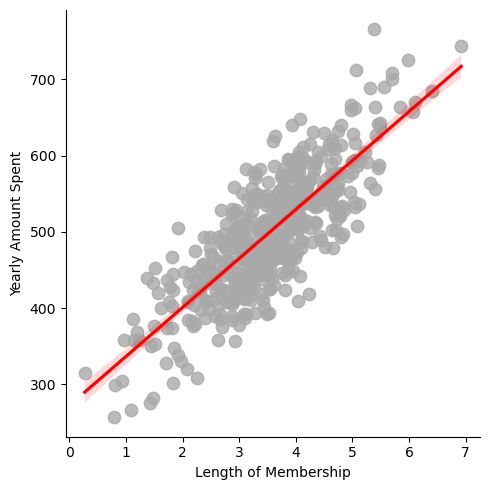

In [69]:
sns.lmplot(x = 'Length of Membership', y = 'Yearly Amount Spent', data= df,
          scatter_kws={'s': 80, 'color': 'darkgrey'},
          line_kws={'color': 'red'})
plt.tight_layout()
plt.show()

This plot cement the initial relation spotted between length of membership and amount spent. Clientele fidelity seems to be an important factor.

## Linear regression model

### Training and Testing Data

In [70]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [71]:
X = df[['Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership']]
y = df['Yearly Amount Spent']

In [72]:
from sklearn.model_selection import train_test_split

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

### Training the Model

In [74]:
from sklearn.linear_model import LinearRegression

Fit the model

In [75]:
lm = LinearRegression()

In [76]:
lm.fit(X_train, y_train)

LinearRegression()

Explore the coefficients of the model

In [86]:
cdf = pd.DataFrame(lm.coef_, X_train.columns, columns = ['Coefficients'])
cdf

,Coefficients
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


### Predicting Test Data

Now that we have fit our model, let's evaluate its performance by predicting off the test values!

In [87]:
predictions = lm.predict(X_test)

Let's plot now the observed (real) vs the predicted values for an initial performance check

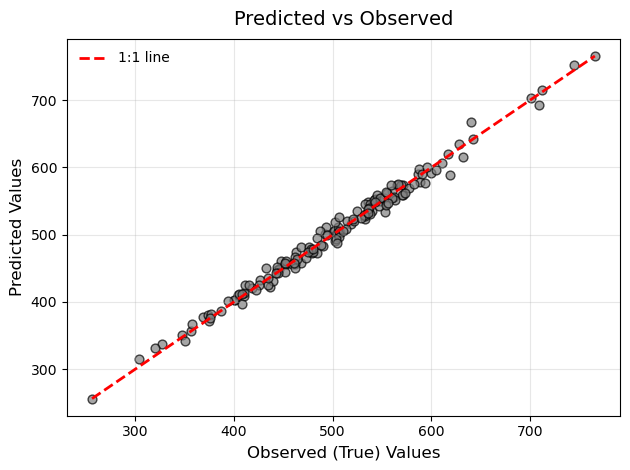

In [95]:
plt.scatter(y_test, predictions, c = 'grey', s=40, alpha=0.7, edgecolor='black')
lims = [min(y_test.min(), predictions.min()), max(y_test.max(), predictions.max())]
plt.plot(lims, lims, '--', color='red', linewidth=2, label='1:1 line')
plt.xlabel("Observed (True) Values", fontsize=12)
plt.ylabel("Predicted Values", fontsize=12)
plt.title("Predicted vs Observed", fontsize=14, pad=10)
plt.grid(alpha=0.3)
plt.legend(frameon=False)
plt.tight_layout()

### Model Evaluation

Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).

In [89]:
from sklearn import metrics

In [96]:
print(f'Mean Absolute Error (MAE): {metrics.mean_absolute_error(y_test, predictions)}')
print(f'Mean Square Error (MSE): {metrics.mean_squared_error(y_test, predictions)}')
print(f'Root Mean Square Error (RMSE): {metrics.root_mean_squared_error(y_test, predictions)}')
print(f'Explained variance (R^2): {metrics.explained_variance_score(y_test, predictions)}')

Mean Absolute Error (MAE): 7.228148653430823
Mean Square Error (MSE): 79.81305165097423
Root Mean Square Error (RMSE): 8.933815066978621
Explained variance (R^2): 0.9890771231889607


### Residuals

Let's quickly explore the residuals to make sure everything was okay with our data.

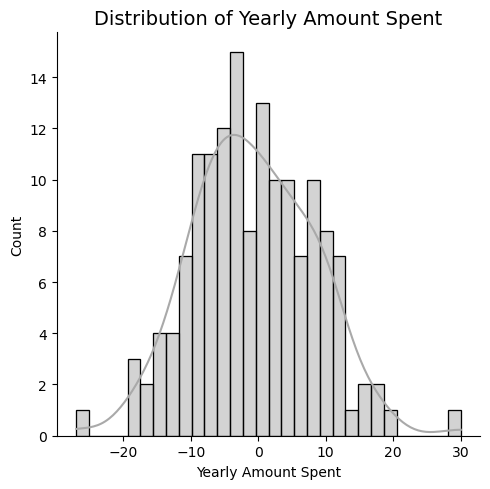

In [91]:
sns.displot((y_test - predictions), color='darkgrey', kde=True, bins = 30)
plt.title("Distribution of Yearly Amount Spent", fontsize=14)
plt.tight_layout()

Residuals are normally distributed. A good sign regarding model fit

## Conclusion

In [97]:
cdf # retrieve the coefficients

,Coefficients
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


---
Interpreting the coefficients:

Holding all other features fixed, a 1 unit increase in Avg. Session Length is associated with an increase of 25.98 total dollars spent.
Holding all other features fixed, a 1 unit increase in Time on App is associated with an increase of 38.59 total dollars spent.
Holding all other features fixed, a 1 unit increase in Time on Website is associated with an increase of 0.19 total dollars spent.
Holding all other features fixed, a 1 unit increase in Length of Membership is associated with an increase of 61.27 total dollars spent.

---

In summary, our regression results indicate that time spent on the mobile app has a much stronger positive relationship with yearly spending than time on the website, even after accounting for membership length and session duration. The length of membership also emerges as the strongest overall predictor, reinforcing that customer retention and loyalty play a central role in revenue generation.

Therefore, the company should prioritise improving the mobile app experience, as it is the most influential driver of customer spending. Enhancing usability, personalization, and engagement features on the app will likely translate into higher purchases and stronger client relationships. At the same time, maintaining a consistent long-term user base remains essential to sustain these gains over time.

However, there is another way to think about this: Develop the Website to catch up to the performance of the mobile app, or develop the app more since that is what is working better. This sort of answer really depends on the other factors going on at the company, you would probably want to explore the relationship between Length of Membership and the App or the Website before coming to a conclusion!

---